In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
physicians = pd.read_csv('physicians.csv')
physicians.head()

,id,specialty
0,0,General Surgery
1,1,Unknown
2,2,Family Practice
3,3,Emergency Medicine
4,4,Plastic and Reconstructive Surgery


In [6]:
procedures = pd.read_csv('procedures.csv')
procedures.head()

,physician_id,procedure_code,procedure,number_of_patients
0,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
1,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15
2,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12
3,0,99212,established_patient_office_or_other_outpatient...,27
4,0,99213,established_patient_office_or_other_outpatient...,16


In [11]:
physproc = pd.merge(left=physicians,right=procedures,how='inner',left_on=['id'],right_on=['physician_id'])
physproc.head()

,id,specialty,physician_id,procedure_code,procedure,number_of_patients
0,0,General Surgery,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
1,0,General Surgery,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15
2,0,General Surgery,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12
3,0,General Surgery,0,99212,established_patient_office_or_other_outpatient...,27
4,0,General Surgery,0,99213,established_patient_office_or_other_outpatient...,16


In [12]:
known_physproc = physproc[physproc['specialty'] != 'Unknown']
known_physproc.head()

,id,specialty,physician_id,procedure_code,procedure,number_of_patients
0,0,General Surgery,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14
1,0,General Surgery,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15
2,0,General Surgery,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12
3,0,General Surgery,0,99212,established_patient_office_or_other_outpatient...,27
4,0,General Surgery,0,99213,established_patient_office_or_other_outpatient...,16


In [13]:
known_physproc['Cardiology'] = known_physproc['specialty'].apply(lambda s : 1 if s == 'Cardiology' else 0)

C:\Users\khiabaniy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
known_physproc.head()

,id,specialty,physician_id,procedure_code,procedure,number_of_patients,Cardiology
0,0,General Surgery,0,99202,"new_patient_office_or_other_outpatient_visit,_...",14,0
1,0,General Surgery,0,99203,"new_patient_office_or_other_outpatient_visit,_...",15,0
2,0,General Surgery,0,99205,"new_patient_office_or_other_outpatient_visit,_...",12,0
3,0,General Surgery,0,99212,established_patient_office_or_other_outpatient...,27,0
4,0,General Surgery,0,99213,established_patient_office_or_other_outpatient...,16,0


In [17]:
physproc_patients = known_physproc[['physician_id','Cardiology','number_of_patients']].groupby(['physician_id','Cardiology'])\
['number_of_patients'].sum().reset_index()
physproc_patients.head()

,physician_id,Cardiology,number_of_patients
0,0,0,109
1,2,0,89
2,3,0,437
3,4,0,33
4,5,1,1532


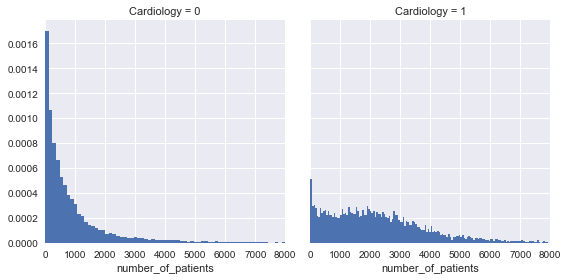

In [18]:
g = sns.FacetGrid(physproc_patients,col='Cardiology',size=4, aspect=1,xlim=(0,8000))
g.map(plt.hist,'number_of_patients',bins=500,normed=True)

In [19]:
physproc_patients.groupby(['Cardiology'])['number_of_patients'].describe()

Cardiology       
0           count    16659.000000
            mean       946.602617
            std       1483.394480
            min         11.000000
            25%        171.000000
            50%        487.000000
            75%       1126.500000
            max      58805.000000
1           count     8274.000000
            mean      2323.924462
            std       1837.959697
            min         11.000000
            25%        994.000000
            50%       2019.500000
            75%       3202.500000
            max      26028.000000
Name: number_of_patients, dtype: float64

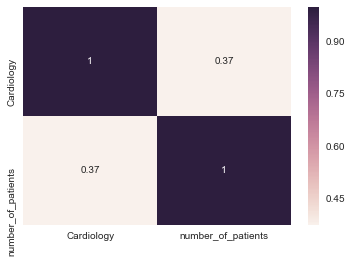

In [24]:
sns.heatmap(physproc_patients[['Cardiology','number_of_patients']].corr(),annot=True)